## Task 7

Descriptive Statistics

# Given dataset: data.csv

Importing required libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Loading dataset
df = pd.read_csv('data.csv')

In [5]:
df.head()

Mthly_HH_Income  ...  No_of_Earning_Members
0             5000  ...                      1
1             6000  ...                      1
2            10000  ...                      1
3            10000  ...                      1
4            12500  ...                      1

[5 rows x 7 columns]

In [6]:
df.describe(include='all')

Mthly_HH_Income  ...  No_of_Earning_Members
count         50.000000  ...              50.000000
unique              NaN  ...                    NaN
top                 NaN  ...                    NaN
freq                NaN  ...                    NaN
mean       41558.000000  ...               1.460000
std        26097.908979  ...               0.734291
min         5000.000000  ...               1.000000
25%        23550.000000  ...               1.000000
50%        35000.000000  ...               1.000000
75%        50375.000000  ...               2.000000
max       100000.000000  ...               4.000000

[11 rows x 7 columns]

In [7]:
df.isna().sum()

Mthly_HH_Income             0
Mthly_HH_Expense            0
No_of_Fly_Members           0
Emi_or_Rent_Amt             0
Annual_HH_Income            0
Highest_Qualified_Member    0
No_of_Earning_Members       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


In [9]:
df['Emi_or_Rent_Amt'].mean()

3060.0

In [10]:
df['Mthly_HH_Expense'].median()

15500.0

In [11]:
df['Annual_HH_Income'].mode()

0    590400
dtype: int64

In [12]:
df['Mthly_HH_Income'].var()

681100853.0612245

In [13]:
df['No_of_Earning_Members'].std()

0.7342912729083656

In [14]:
df['Highest_Qualified_Member'].value_counts()

Graduate          19
Under-Graduate    10
Professional      10
Post-Graduate      6
Illiterate         5
Name: Highest_Qualified_Member, dtype: int64

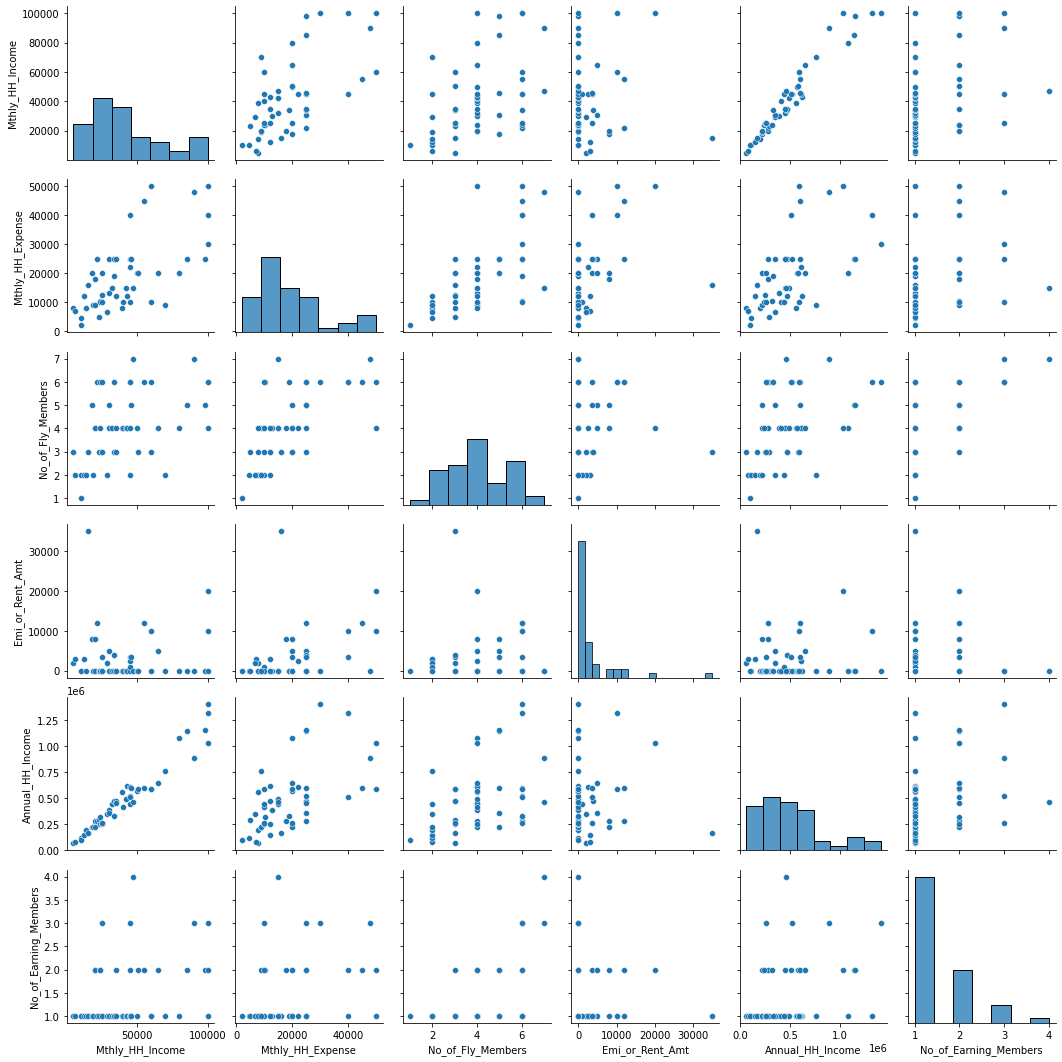

In [15]:
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


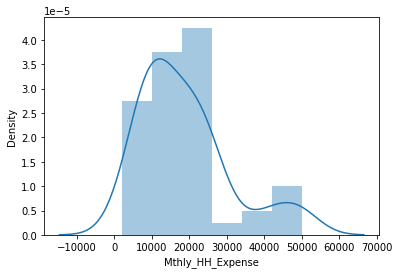

In [16]:
sns.distplot(df['Mthly_HH_Expense'])

Conclusion:
The Mthly_HH_Expense has long tail on right side. Hence, it is a positively skewed distribution

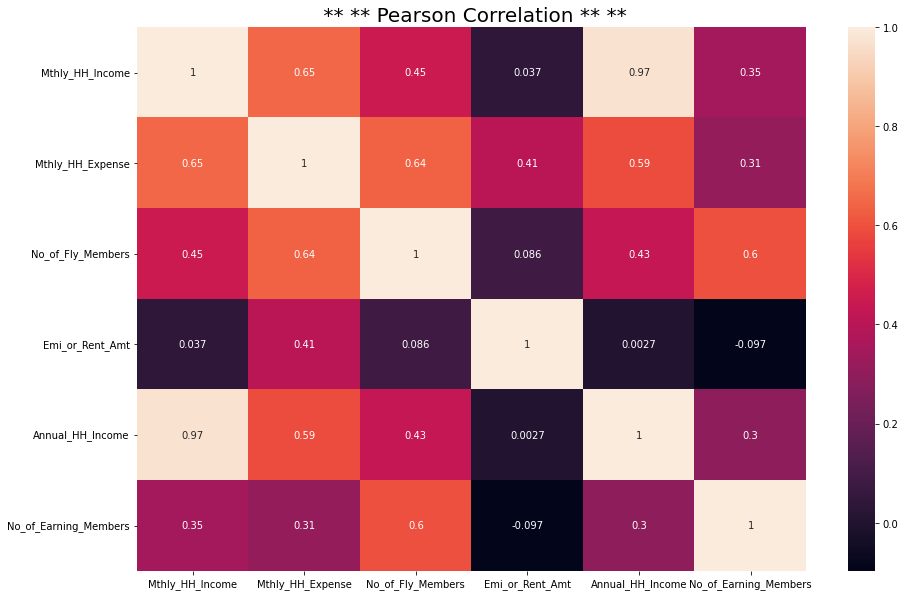

In [17]:
plt.figure(figsize=(15,10))
plt.title(' ** ** Pearson Correlation ** **', fontsize = 20)
sns.heatmap(df.corr('pearson'),annot=True)

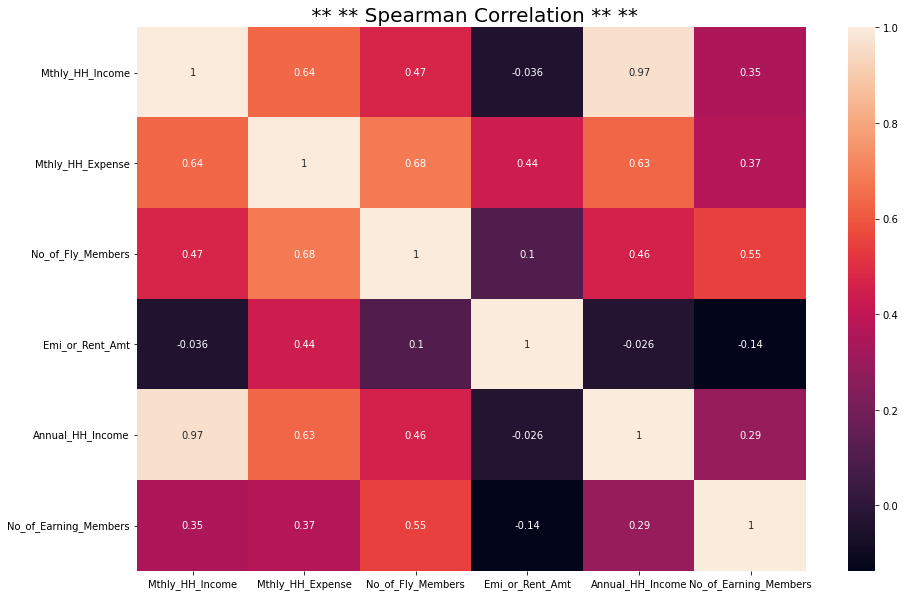

In [18]:
plt.figure(figsize=(15,10))
plt.title(' ** ** Spearman Correlation ** **', fontsize = 20)
sns.heatmap(df.corr('spearman'),annot=True)

In [21]:
df.corr()

Mthly_HH_Income  ...  No_of_Earning_Members
Mthly_HH_Income               1.000000  ...               0.347883
Mthly_HH_Expense              0.649215  ...               0.311915
No_of_Fly_Members             0.448317  ...               0.597482
Emi_or_Rent_Amt               0.036976  ...              -0.097431
Annual_HH_Income              0.970315  ...               0.296679
No_of_Earning_Members         0.347883  ...               1.000000

[6 rows x 6 columns]

In [35]:
def plot_qqplt(clm):       
    plt.figure(figsize=(10,10)) 
    print(clm)
    sm.qqplot(df[clm], line ='45',fit=True)
    plt.show()

In [33]:
help(sm.qqplot)

Help on function qqplot in module statsmodels.graphics.gofplots:

qqplot(data, dist=<scipy.stats._continuous_distns.norm_gen object at 0x7f40ddd71ad0>, distargs=(), a=0, loc=0, scale=1, fit=False, line=None, ax=None, **plotkwargs)
    Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
    
    Can take arguments specifying the parameters for dist or fit them
    automatically. (See fit under Parameters.)
    
    Parameters
    ----------
    data : array-like
        1d data array
    dist : A scipy.stats or statsmodels distribution
        Compare x against dist. The default
        is scipy.stats.distributions.norm (a standard normal).
    distargs : tuple
        A tuple of arguments passed to dist to specify it fully
        so dist.ppf may be called.
    loc : float
        Location parameter for dist
    a : float
        Offset for the plotting position of an expected order statistic, for
        example. The plotting positions are given by (i - a)/(nobs

Mthly_HH_Income


<Figure size 720x720 with 0 Axes>

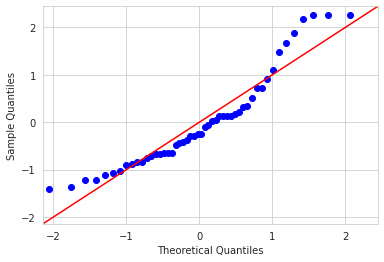

Mthly_HH_Expense


<Figure size 720x720 with 0 Axes>

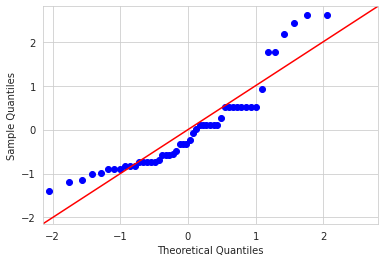

No_of_Fly_Members


<Figure size 720x720 with 0 Axes>

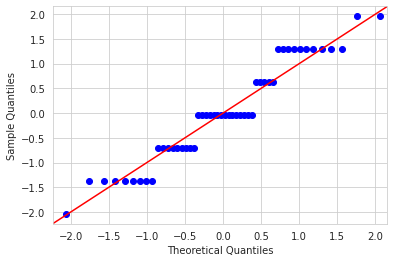

Emi_or_Rent_Amt


<Figure size 720x720 with 0 Axes>

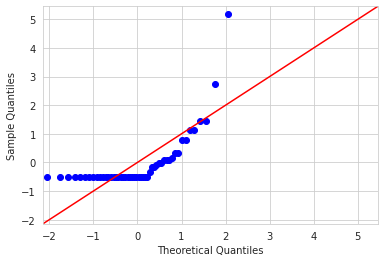

Annual_HH_Income


<Figure size 720x720 with 0 Axes>

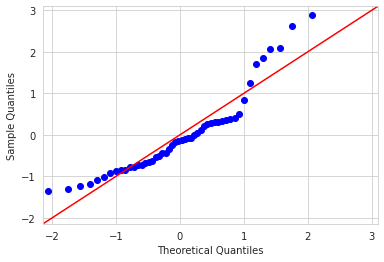

No_of_Earning_Members


<Figure size 720x720 with 0 Axes>

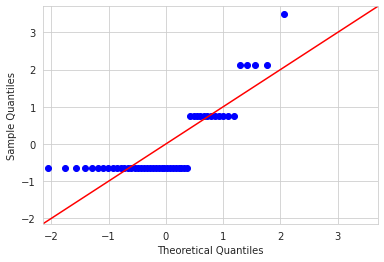

In [36]:
for clm in df.columns:
    if clm == 'Highest_Qualified_Member':
        pass
    else:
        plot_qqplt(clm)